# Minimal example with TensorFlow 2.0
In this notebook we will recreate our machine learning algorithm using TF 2.0.

## Import the relevant libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

## Data generation

In [2]:
observations = 1000

xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(-10, 10, (observations,1))

generated_inputs = np.column_stack((xs,zs))

noise = np.random.uniform(-1, 1, (observations,1))

generated_targets = 2*xs - 3*zs + 5 + noise

np.savez('TF_intro', inputs=generated_inputs, targets=generated_targets)


## Solving with TensorFlow

In [3]:
training_data = np.load('TF_intro.npz')

In [4]:
input_size = 2
output_size = 1

model = tf.keras.Sequential([
                            tf.keras.layers.Dense(output_size,
                                                 kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
                                                 bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)
                                                 )
                            ])

custom_optimizer = tf.keras.optimizers.SGD(learning_rate=0.02)

model.compile(optimizer=custom_optimizer, loss='mean_squared_error')

model.fit(training_data['inputs'], training_data['targets'], epochs=100, verbose=2)

Epoch 1/100
32/32 - 0s - loss: 37.5310
Epoch 2/100
32/32 - 0s - loss: 1.0121
Epoch 3/100
32/32 - 0s - loss: 0.4356
Epoch 4/100
32/32 - 0s - loss: 0.3989
Epoch 5/100
32/32 - 0s - loss: 0.3616
Epoch 6/100
32/32 - 0s - loss: 0.3792
Epoch 7/100
32/32 - 0s - loss: 0.3665
Epoch 8/100
32/32 - 0s - loss: 0.3778
Epoch 9/100
32/32 - 0s - loss: 0.3819
Epoch 10/100
32/32 - 0s - loss: 0.3731
Epoch 11/100
32/32 - 0s - loss: 0.3932
Epoch 12/100
32/32 - 0s - loss: 0.3738
Epoch 13/100
32/32 - 0s - loss: 0.3627
Epoch 14/100
32/32 - 0s - loss: 0.3750
Epoch 15/100
32/32 - 0s - loss: 0.4517
Epoch 16/100
32/32 - 0s - loss: 0.3859
Epoch 17/100
32/32 - 0s - loss: 0.3662
Epoch 18/100
32/32 - 0s - loss: 0.4232
Epoch 19/100
32/32 - 0s - loss: 0.3963
Epoch 20/100
32/32 - 0s - loss: 0.3641
Epoch 21/100
32/32 - 0s - loss: 0.3805
Epoch 22/100
32/32 - 0s - loss: 0.3785
Epoch 23/100
32/32 - 0s - loss: 0.3703
Epoch 24/100
32/32 - 0s - loss: 0.3853
Epoch 25/100
32/32 - 0s - loss: 0.3883
Epoch 26/100
32/32 - 0s - loss: 0

## Extract the weights and bias

In [5]:
model.layers[0].get_weights()

[array([[ 2.0143743],
        [-3.0399518]], dtype=float32),
 array([4.9882874], dtype=float32)]

In [6]:
weights = model.layers[0].get_weights()[0]
weights

array([[ 2.0143743],
       [-3.0399518]], dtype=float32)

In [7]:
bias = model.layers[0].get_weights()[1]
bias

array([4.9882874], dtype=float32)

## Extract the outputs (make predictions)

In [8]:
model.predict_on_batch(training_data['inputs']).round(1)

array([[ 20.5],
       [-10. ],
       [  5.4],
       [ 19. ],
       [ 23.1],
       [-20.2],
       [-18. ],
       [ 47.9],
       [ 52.9],
       [ 25.8],
       [ -2.1],
       [ 46.3],
       [ -3.1],
       [ -6.1],
       [-30.8],
       [-12. ],
       [ 20. ],
       [ 20.2],
       [-10.9],
       [  2.4],
       [  5.1],
       [ 40.1],
       [ 47.3],
       [  4.2],
       [ 23.4],
       [-17.9],
       [ -2.8],
       [-17.8],
       [ 35.3],
       [ 40.6],
       [ 36.6],
       [-15.2],
       [ 28.9],
       [ 21.6],
       [  8.8],
       [-12.9],
       [ 36.2],
       [-14.3],
       [-12.2],
       [ 29.9],
       [ 23. ],
       [ 33.1],
       [  0.7],
       [ 13.4],
       [ 14.1],
       [ -6.8],
       [ 34.1],
       [ 38.9],
       [ 18.3],
       [  8. ],
       [ -7.8],
       [ -6.4],
       [ 30.5],
       [ -0.1],
       [ 30.6],
       [ -7.2],
       [ -3.4],
       [ -9.4],
       [ 26.9],
       [ 39.7],
       [ 12.8],
       [ 23.4],
       [

In [9]:
training_data['targets'].round(1)

array([[ 20.2],
       [-10.4],
       [  5.3],
       [ 19. ],
       [ 23.5],
       [-19.4],
       [-17.3],
       [ 48.1],
       [ 52.2],
       [ 25.6],
       [ -1.3],
       [ 46.6],
       [ -3. ],
       [ -5.3],
       [-29.5],
       [-11.2],
       [ 20.3],
       [ 20.4],
       [-11.6],
       [  2.4],
       [  4.9],
       [ 39.2],
       [ 47.1],
       [  4.5],
       [ 23.1],
       [-16.5],
       [ -1.9],
       [-17.5],
       [ 36. ],
       [ 39.9],
       [ 36.9],
       [-15.1],
       [ 29.2],
       [ 20.8],
       [  8.4],
       [-12. ],
       [ 34.8],
       [-14.2],
       [-12.5],
       [ 28.8],
       [ 22.5],
       [ 33.5],
       [  1. ],
       [ 13. ],
       [ 14.7],
       [ -5.8],
       [ 33. ],
       [ 38.2],
       [ 18.9],
       [  7.8],
       [ -8.4],
       [ -5.7],
       [ 30.4],
       [ -0.5],
       [ 31.3],
       [ -7.3],
       [ -2.5],
       [ -9.8],
       [ 26.5],
       [ 38.5],
       [ 13.2],
       [ 23.8],
       [

## Plotting the data

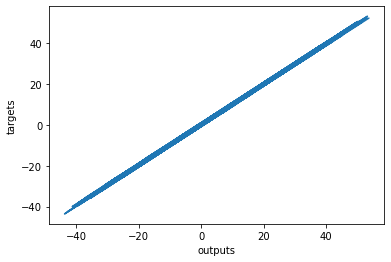

In [10]:
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])), np.squeeze(training_data['targets']))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()